## Bernstein-Vazirani Algorithm
- Suppose you have a number with n bits , hidden inside somewhere.
- A classical computer can do the guessing of the number in n tries
- Quantum computer can do it in <font color = 'red'>ONE</font> try independent of the size of the umber that you have .
- How? 
- Setup-> 
    - You have a box with the number hidden inside it
    - For example - **110011**
    - You have a function, in which if you feed a number, it returns you a Yes or a No, pertaining to whether the number is same as the one inside the box or not.
    - BOX - 110011
    - Func(000000) -> returns **FALSE**
    - Func(010010) -> returns **FALSE**
    - Func(110011) -> returns **TRUE**


## Well 
- You may say that "Just take the and of the number with 111...111 ( n times) and you'll find your number in a single try.
- But hold on, THIS WOULD STILL REQUIRE *N AND OPERATIONS*.
- A Quantum computer can do this in <font color='red'>ONE TRY </font>

In [55]:
# example 
from qiskit import *
%matplotlib inline 
from qiskit.tools.visualization import plot_histogram
import numpy as np

In [2]:
secret = '110011'
# we are building the BLACK BOX OURSELVES
# the scenario actually would be we have a black box 
# how do we extract the number from it? 
# So, we are actually building the black box 
# and trying it out for ourselves only...

### Building the **BLACK BOX**
- This black box will be given to me, my job is to efficiently make a guess
- Which I do after applying the hadamard gates


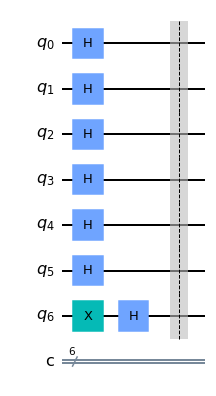

In [112]:
# make a six qubit circuit 
Q = QuantumCircuit(6+1,6)
Q.h([0,1,2,3,4,5]) # creating equal superposition of six qubits
# a different config for last qubit 
# just creates 
Q.x(6) 
Q.h(6)
Q.barrier()
Q.draw(output='mpl')

In [15]:
secret

'110011'

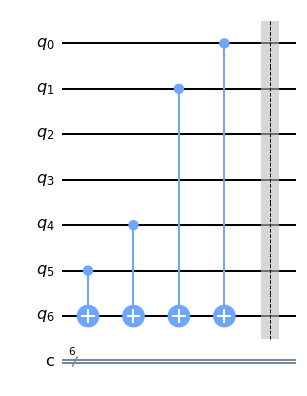

In [113]:
# making the circuit corresponding to the secret key 
circuit = QuantumCircuit(6+1,6,name="Black Box")
# apply Cx gates from bit i to the last qubit 
# to make it one whenever the i bit is  1 
circuit.cx(5,6)
circuit.cx(4,6)
circuit.cx(1,6)
circuit.cx(0,6)
circuit.barrier()
circuit.draw(output='mpl')

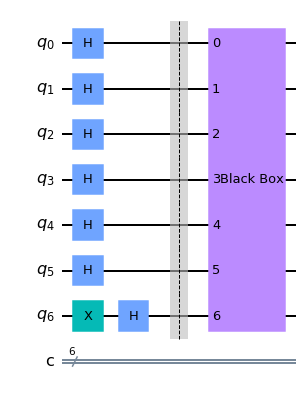

In [114]:
Q.append(circuit,circuit.qubits,circuit.clbits)
Q.draw(output='mpl')

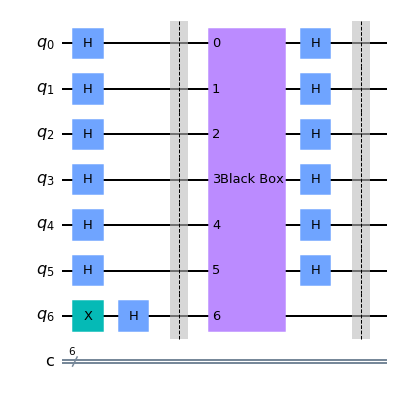

In [115]:
# now we need hadamard gates to again get back our qubits from the superposition
Q.h([0,1,2,3,4,5])
Q.barrier()
Q.draw(output='mpl')

## Final Circuit 
- Black box is actually the thing which would produce yes or no for our algorithm.

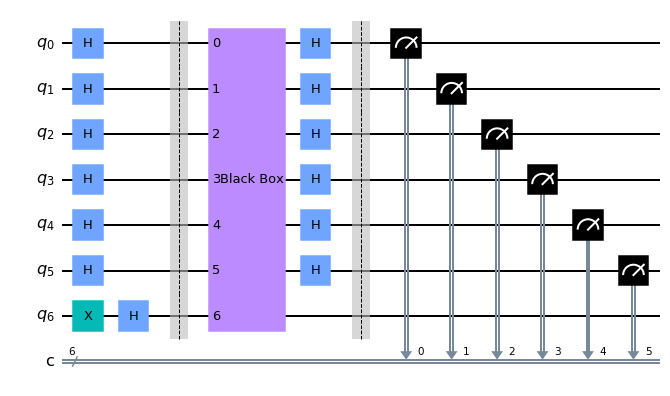

In [116]:
Q.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
Q.draw(output='mpl')

In [142]:
## Now we just make a single SHOT AT THE REAL SIMULATORS

from qiskit import IBMQ
from qiskit.providers import provider
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()

provider= IBMQ.get_provider(hub='ibm-q')
from qiskit.providers.ibmq import least_busy
# code for backend 
backend_lb = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 7 and
                                   not b.configuration().simulator and b.status().operational==True))
print("Least busy backend: ", backend_lb)

job = execute(Q,backend = backend_lb,shots=5000)
job_monitor(job)
result = job.result()
print(result.get_counts())

# Simulating here

In [119]:
b = Aer.get_backend('qasm_simulator')
result = execute(Q,backend = b,shots= 1).result()
counts = result.get_counts()
print(counts)

{'110011': 1}


## The gist 
- Well, we do not have the secret number 
- We do not make the black box which gives you YES/No answer
- BUT, we can get the secret number by providing an EQUAL SUPERPOSITION of ALL THE QUBITS to the black box and then recieving the outputs. 
- This is what the algorithm is 

## Generalizing

In [137]:
def black_box(n):
    '''Returns an N-bit secret number black box / quantum circuit...'''
    secret = ""
    for i in range(n):
        b = np.random.randint(0,2)
        secret+=str(b)
    Q = QuantumCircuit(n+1,n,name="Black Box")
    for i,s in enumerate(secret[::-1]):
        if(s=='1'):
            # add a controlled x gate to make it 1
            Q.cx(i,n)
    Q.barrier()
    Q.h(range(n))
    print(secret)
    display(Q.draw(output='mpl'))
    return Q

10110


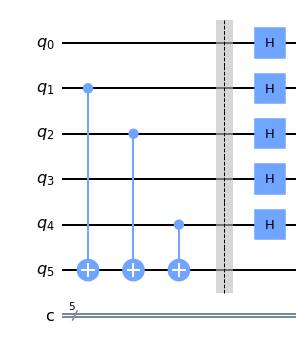

In [138]:
box = black_box(5)
Q = QuantumCircuit(5+1,5)
Q.h(range(5))
Q.x(5)
Q.h(5)
Q.append(box,box.qubits,box.clbits)
Q.barrier()
Q.measure(range(5),range(5))


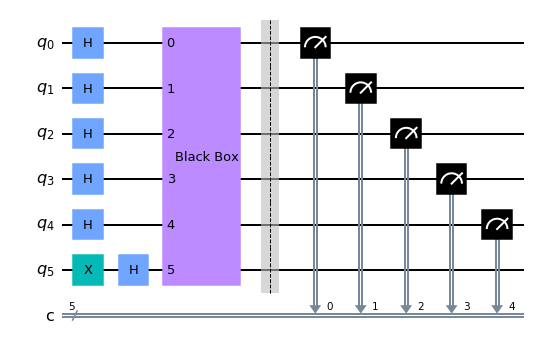

In [139]:
Q.draw(output='mpl')

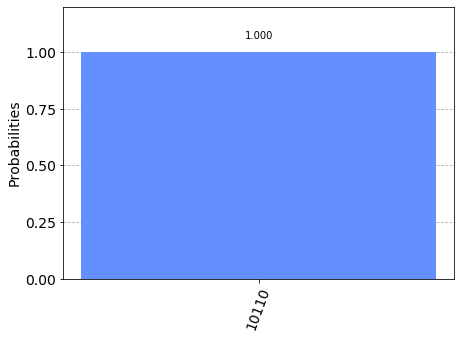

In [140]:
b = Aer.get_backend('qasm_simulator')
count = execute(Q,backend=b,shots=1000).result().get_counts()
plot_histogram(count)


## Yes , works...

In [141]:
## Now we just make a single SHOT AT THE REAL SIMULATORS
provider= IBMQ.get_provider(hub='ibm-q')
from qiskit.providers.ibmq import least_busy
# code for backend 
backend_lb = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 7 and
                                   not b.configuration().simulator and b.status().operational==True))
print("Least busy backend: ", backend_lb)

job = execute(Q,backend = backend_lb,shots=5000)
job_monitor(job)
result = job.result()
print(result.get_counts())

Least busy backend:  ibmq_16_melbourne
Job Status: job has successfully run
{'00000': 311, '00001': 4, '10000': 313, '10001': 8, '10010': 527, '10011': 9, '10100': 354, '10101': 10, '10110': 580, '10111': 2, '11000': 175, '11001': 3, '11010': 212, '11011': 4, '11100': 184, '11101': 2, '11110': 222, '00010': 485, '00011': 7, '00100': 305, '00101': 2, '00110': 499, '00111': 3, '01000': 183, '01001': 7, '01010': 202, '01011': 2, '01100': 157, '01101': 3, '01110': 220, '01111': 5}


### Kind of worked
- Given our secret number was $10110$, we see it has the highest number fof counts returned